In [1]:
# MOHSEN
import os
from dotenv import load_dotenv
from huggingface_hub import login

load_dotenv()
login(os.environ["HF_TOKEN"])
print("CUDA_VISIBLE_DEVICES:", os.environ["CUDA_VISIBLE_DEVICES"], "HF_HOME:", os.environ["HF_HOME"])

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /home/mohsenfayyaz/.cache/huggingface/token
Login successful
CUDA_VISIBLE_DEVICES: 0 HF_HOME: /local1/mohsenfayyaz/.hfcache/


In [2]:
import torch
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import display, HTML
import transformers
from transformers import AutoTokenizer, AutoConfig

from DecompX.src.decompx_utils import DecompXConfig
from DecompX.src.modeling_bert import BertForSequenceClassification, BertModel
from DecompX.src.modeling_roberta import RobertaForSequenceClassification, RobertaModel

pd.set_option('display.max_columns', None)

### NQ
# df_raw = pd.read_pickle("hf://datasets/Retriever-Contextualization/datasets/nq/facebook--contriever-msmarco_corpus2681468.pkl")

### RE_DOCRED
df_raw = pd.read_pickle("hf://datasets/Retriever-Contextualization/datasets/re-docred/facebook--contriever-msmarco_corpus105925.pkl")
attrs = df_raw.attrs.copy()
df_raw = df_raw.merge(pd.read_pickle("hf://datasets/Retriever-Contextualization/datasets/Re-DocRED/queries_test_validation.pkl"), left_on="query_id", right_on="id")
df_raw.attrs = attrs

df_raw

,query_id,query,gold_docs,gold_docs_text,scores_stats,scores_gold,scores_1000,predicted_docs_text_10,id,title,vertexSet,labels,sents,split,label,label_idx,head_entity,tail_entity,head_entity_names,tail_entity_names,head_entity_longest_name,tail_entity_longest_name,head_entity_types,tail_entity_types,evidence_sent_ids,evidence_sents,head_entity_in_evidence,tail_entity_in_evidence,relation,relation_name,query_question,duplicate_titles_len,duplicate_titles
0,test0,When was Loud Tour published?,[Loud Tour],{'Loud Tour': {'text': 'The Loud Tour was the ...,"{'len': 1000, 'max': 0.5781064033508301, 'min'...",{'Loud Tour': 0.5781064033508301},"{'Loud Tour': 0.5781064033508301, 'Images and ...",{'Loud Tour': {'text': 'The Loud Tour was the ...,test0,Loud Tour,"[[{'name': 'Loud', 'pos': [23, 24], 'sent_id':...","[{'r': 'P577', 'h': 0, 't': 6, 'evidence': [1]...","[[The, Loud, Tour, was, the, fourth, overall, ...",test,"{'r': 'P577', 'h': 0, 't': 6, 'evidence': [1]}",0,"[{'name': 'Loud', 'pos': [23, 24], 'sent_id': ...","[{'pos': [25, 26], 'type': 'TIME', 'sent_id': ...","{Loud Tour, Loud}",{2010},Loud Tour,2010,{MISC},{TIME},[1],"[[Performing, in, over, twenty, countries, in,...","[{'name': 'Loud', 'pos': [23, 24], 'sent_id': ...","[{'pos': [25, 26], 'type': 'TIME', 'sent_id': ...",P577,publication date,When was Loud Tour published?,0,{}
1,test1,Who performed Loud Tour?,[Loud Tour],{'Loud Tour': {'text': 'The Loud Tour was the ...,"{'len': 1000, 'max': 0.6464771032333374, 'min'...",{'Loud Tour': 0.6464771032333374},"{'Loud Tour': 0.6464771032333374, 'Live &amp; ...",{'Loud Tour': {'text': 'The Loud Tour was the ...,test1,Loud Tour,"[[{'name': 'Loud', 'pos': [23, 24], 'sent_id':...","[{'r': 'P577', 'h': 0, 't': 6, 'evidence': [1]...","[[The, Loud, Tour, was, the, fourth, overall, ...",test,"{'r': 'P175', 'h': 0, 't': 2, 'evidence': [0, 1]}",1,"[{'name': 'Loud', 'pos': [23, 24], 'sent_id': ...","[{'name': 'Rihanna', 'pos': [3, 4], 'sent_id':...","{Loud Tour, Loud}",{Rihanna},Loud Tour,Rihanna,{MISC},{PER},"[0, 1]","[[The, Loud, Tour, was, the, fourth, overall, ...","[{'name': 'Loud', 'pos': [23, 24], 'sent_id': ...","[{'name': 'Rihanna', 'pos': [18, 19], 'sent_id...",P175,performer,Who performed Loud Tour?,0,{}
2,test2,Which administrative territorial entity is The...,[Loud Tour],{'Loud Tour': {'text': 'The Loud Tour was the ...,"{'len': 1000, 'max': 0.5116168260574341, 'min'...",{'Loud Tour': None},{'International Ice Hockey Federation': 0.5116...,{'International Ice Hockey Federation': {'text...,test2,Loud Tour,"[[{'name': 'Loud', 'pos': [23, 24], 'sent_id':...","[{'r': 'P577', 'h': 0, 't': 6, 'evidence': [1]...","[[The, Loud, Tour, was, the, fourth, overall, ...",test,"{'r': 'P131', 'h': 10, 't': 8, 'evidence': [4]}",2,"[{'sent_id': 4, 'type': 'LOC', 'pos': [11, 14]...","[{'name': 'London', 'pos': [1, 2], 'sent_id': ...",{The O2 Arena},{London},The O2 Arena,London,{LOC},{LOC},[4],"[[In, London, ,, Rihanna, played, a, record, b...","[{'sent_id': 4, 'type': 'LOC', 'pos': [11, 14]...","[{'name': 'London', 'pos': [1, 2], 'sent_id': ...",P131,located in the administrative territorial entity,Which administrative territorial entity is The...,0,{}
3,test4,Which country is The O2 Arena associated with?,[Loud Tour],{'Loud Tour': {'text': 'The Loud Tour was the ...,"{'len': 1000, 'max': 0.5047674179077148, 'min'...",{'Loud Tour': 0.3846467435359955},{'Olimpiyskiy National Sports Complex': 0.5047...,{'Olimpiyskiy National Sports Complex': {'text...,test4,Loud Tour,"[[{'name': 'Loud', 'pos': [23, 24], 'sent_id':...","[{'r': 'P577', 'h': 0, 't': 6, 'evidence': [1]...","[[The, Loud, Tour, was, the, fourth, overall, ...",test,"{'r': 'P17', 'h': 10, 't': 7, 'evidence': [3, 4]}",4,"[{'sent_id': 4, 'type': 'LOC', 'pos': [11, 14]...","[{'name': 'United Kingdom', 'pos': [18, 20], '...",{The O2 Arena},{United Kingdom},The O2 Arena,United Kingdom,{LOC},{LOC},"[3, 4]","[[The, Loud, Tour, was, a, large, commercial, ...","[{'sent_id': 4, 'type': 'LOC', 'pos': 

Total: 7170
Total: 7170


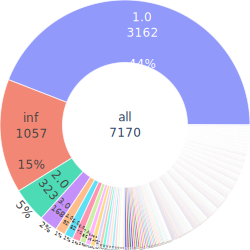

,query_id,query,gold_docs,gold_docs_text,scores_stats,scores_gold,scores_1000,predicted_docs_text_10,id,title,vertexSet,labels,sents,split,label,label_idx,head_entity,tail_entity,head_entity_names,tail_entity_names,head_entity_longest_name,tail_entity_longest_name,head_entity_types,tail_entity_types,evidence_sent_ids,evidence_sents,head_entity_in_evidence,tail_entity_in_evidence,relation,relation_name,query_question,duplicate_titles_len,duplicate_titles,hit_rank,gold_doc,gold_doc_title,gold_doc_text,gold_doc_score,pred_doc,pred_doc_title,pred_doc_text,pred_doc_score,gold_doc_len,pred_doc_len
4980,validation5927,Which sports team is Christian Atsu Twasam a m...,[Christian Atsu],{'Christian Atsu': {'text': 'Christian Atsu Tw...,"{'len': 1000, 'max': 0.6057623624801636, 'min'...",{'Christian Atsu': 0.6057623624801636},"{'Christian Atsu': 0.6057623624801636, 'West V...",{'Christian Atsu': {'text': 'Christian Atsu Tw...,validation5927,Christian Atsu,"[[{'type': 'PER', 'pos': [0, 3], 'name': 'Chri...","[{'r': 'P569', 'h': 0, 't': 1, 'evidence': [0]...","[[Christian, Atsu, Twasam, (, born, 10, Januar...",validation,"{'r': 'P54', 'h': 0, 't': 10, 'evidence': [3]}",8,"[{'type': 'PER', 'pos': [0, 3], 'name': 'Chris...","[{'name': 'Vitesse Arnhem', 'pos': [18, 20], '...","{Christian Atsu Twasam, Atsu}",{Vitesse Arnhem},Christian Atsu Twasam,Vitesse Arnhem,{PER},{ORG},[3],"[[In, 2013, ,, he, was, signed, by, Chelsea, f...",[],"[{'name': 'Vitesse Arnhem', 'pos': [18, 20], '...",P54,member of sports team,Which sports team is Christian Atsu Twasam a m...,0,{},1.0,Christian Atsu Christian Atsu Twasam ( born 10...,Christian Atsu,Christian Atsu Twasam ( born 10 January 1992 )...,0.605762,Christian Atsu Christian Atsu Twasam ( born 10...,Christian Atsu,Christian Atsu Twasam ( born 10 January 1992 )...,0.605762,180,180
3386,test15467,Which administrative territorial entity is New...,[New Haven Harbor],{'New Haven Harbor': {'text': 'New Haven Harbo...,"{'len': 1000, 'max': 0.681281328201294, 'min':...",{'New Haven Harbor': 0.681281328201294},"{'New Haven Harbor': 0.681281328201294, 'Great...",{'New Haven Harbor': {'text': 'New Haven Harbo...,test15467,New Haven Harbor,"[[{'name': 'New Haven Harbor', 'pos': [0, 3], ...","[{'r': 'P706', 'h': 0, 't': 1, 'evidence': [0]...","[[New, Haven, Harbor, is, an, inlet, on, the, ...",test,"{'h': 0, 't': 3, 'r': 'P131', 'evidence': [0]}",64,"[{'name': 'New Haven Harbor', 'pos': [0, 3], '...","[{'name': 'the United States', 'pos': [20, 23]...",{New Haven Harbor},{the United States},New Haven Harbor,the United States,{LOC},{LOC},[0],"[[New, Haven, Harbor, is, an, inlet, on, the, ...","[{'name': 'New Haven Harbor', 'pos': [0, 3], '...","[{'name': 'the United States', 'pos': [20, 23]...",P131,located in the administrative territorial entity,Which administrative territorial entity is New...,0,{},1.0,New Haven Harbor New Haven Harbor is an inlet ...,New Haven Harbor,New Haven Harbor is an inlet on the north side...,0.681281,New Haven Harbor New Haven Harbor is an inlet ...,New Haven Harbor,New Haven Harbor is an inlet on the north side...,0.681281,268,268
4328,validation3158,Which administrative territorial entity is Reg...,[Regal Mountain],{'Regal Mountain': {'text': 'Regal Mountain is...,"{'len': 1000, 'max': 0.6429650187492371, 'min'...",{'Regal Mountain': 0.6429650187492371},"{'Regal Mountain': 0.6429650187492371, 'Pasayt...",{'Regal Mountain': {'text': 'Regal Mountain is...,validation3158,Regal Mountain,"[[{'name': 'Regal Mountain', 'pos': [0, 2], 's...","[{'r': 'P361', 'h': 0, 't': 1, 'evidence': [0]...","[[Regal, Mountain, is, an, eroded, stratovolca...",validation,"{'h': 0, 't': 5, 'r': 'P131', 'evidence': [0, 1]}",42,"[{'name': 'Regal Mountain', 'pos': [0, 2], 'se...","[{'name': 'the United States', 'pos': [21, 24]...",{Regal Mountain},{the United States},Regal Mountain,the United States,{LOC},{LOC},"[0, 1]","[[Regal, Mountain, is, an, eroded, stratovolca...","[{'name': 'Regal Mountain', 'pos': [0, 2], 'se..

In [3]:
### df filtering
import plotly.express as px

def find_index(l, idx, not_found_value=np.inf):
    try:
        return l.index(idx)
    except:
        return not_found_value

### FILTER MULTI GOLD DOCS
print("Total:", len(df_raw))
df = df_raw.loc[df_raw["gold_docs"].str.len() == 1, :].copy()
print("Total:", len(df))
# df.drop_duplicates(subset=["query"], keep="first", inplace=True)
# print("Total:", len(df))

### COMPUTE HIT RANK
df["hit_rank"] = df.apply(lambda row: min([find_index(list(row["scores_1000"].keys()), doc_id) + 1 for doc_id in row["gold_docs"]]), axis=1)
# df["hit_rank"].hist(figsize=(8, 4), bins=50)

dfc = df.copy(); dfc["hit_rank"] = dfc["hit_rank"].astype(str);
fig = px.sunburst(dfc, path=[px.Constant("all"), 'hit_rank'], width=250, height=250)
fig.update_traces(textinfo='label+percent entry+value')
fig.update_layout(margin={'t':0,'l':0,'b':0,'r':0})
fig.show("svg")

### Prepare Docs (title+text)
df["gold_doc"] = df["gold_docs_text"].apply(lambda x: list(x.items())[0][1])
df["gold_doc_title"] = df["gold_doc"].apply(lambda x: x["title"])
df["gold_doc_text"] = df["gold_doc"].apply(lambda x: x["text"])
df["gold_doc"] = df["gold_doc"].apply(lambda x: x["title"] + " " + x["text"])
df["gold_doc_score"] = df["scores_gold"].apply(lambda x: list(x.items())[0][1])

df["pred_doc"] = df["predicted_docs_text_10"].apply(lambda x: list(x.items())[0][1])
df["pred_doc_title"] = df["pred_doc"].apply(lambda x: x["title"])
df["pred_doc_text"] = df["pred_doc"].apply(lambda x: x["text"])
df["pred_doc"] = df["pred_doc"].apply(lambda x: x["title"] + " " + x["text"])
df["pred_doc_score"] = df["scores_1000"].apply(lambda x: list(x.items())[0][1])

df["gold_doc_len"] = df["gold_doc"].str.split().apply(len)
df["pred_doc_len"] = df["pred_doc"].str.split().apply(len)


df.sort_values("hit_rank")

In [4]:
df.head(1)

,query_id,query,gold_docs,gold_docs_text,scores_stats,scores_gold,scores_1000,predicted_docs_text_10,id,title,vertexSet,labels,sents,split,label,label_idx,head_entity,tail_entity,head_entity_names,tail_entity_names,head_entity_longest_name,tail_entity_longest_name,head_entity_types,tail_entity_types,evidence_sent_ids,evidence_sents,head_entity_in_evidence,tail_entity_in_evidence,relation,relation_name,query_question,duplicate_titles_len,duplicate_titles,hit_rank,gold_doc,gold_doc_title,gold_doc_text,gold_doc_score,pred_doc,pred_doc_title,pred_doc_text,pred_doc_score,gold_doc_len,pred_doc_len
0,test0,When was Loud Tour published?,[Loud Tour],{'Loud Tour': {'text': 'The Loud Tour was the ...,"{'len': 1000, 'max': 0.5781064033508301, 'min'...",{'Loud Tour': 0.5781064033508301},"{'Loud Tour': 0.5781064033508301, 'Images and ...",{'Loud Tour': {'text': 'The Loud Tour was the ...,test0,Loud Tour,"[[{'name': 'Loud', 'pos': [23, 24], 'sent_id':...","[{'r': 'P577', 'h': 0, 't': 6, 'evidence': [1]...","[[The, Loud, Tour, was, the, fourth, overall, ...",test,"{'r': 'P577', 'h': 0, 't': 6, 'evidence': [1]}",0,"[{'name': 'Loud', 'pos': [23, 24], 'sent_id': ...","[{'pos': [25, 26], 'type': 'TIME', 'sent_id': ...","{Loud Tour, Loud}",{2010},Loud Tour,2010,{MISC},{TIME},[1],"[[Performing, in, over, twenty, countries, in,...","[{'name': 'Loud', 'pos': [23, 24], 'sent_id': ...","[{'pos': [25, 26], 'type': 'TIME', 'sent_id': ...",P577,publication date,When was Loud Tour published?,0,{},1.0,Loud Tour The Loud Tour was the fourth overall...,Loud Tour,The Loud Tour was the fourth overall and third...,0.578106,Loud Tour The Loud Tour was the fourth overall...,Loud Tour,The Loud Tour was the fourth overall and third...,0.578106,142,142


'When was Loud Tour published?'

In [5]:
DATASET = df.attrs["dataset"]
MODEL = df.attrs["model"]  # 'facebook/contriever-msmarco'  # Only BERT or RoBERTa
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
CONFIGS = {
    "DecompX":
        DecompXConfig(
            include_biases=True,
            bias_decomp_type="absdot",
            include_LN1=True,
            include_FFN=True,
            FFN_approx_type="GeLU_ZO",
            include_LN2=True,
            aggregation="vector",
            include_classifier_w_pooler=True,
            tanh_approx_type="ZO",
            output_all_layers=True,
            output_attention=None,
            output_res1=None,
            output_LN1=None,
            output_FFN=None,
            output_res2=None,
            output_encoder=None,
            output_aggregated="vector",  # Changed
            output_pooler="norm",
            output_classifier=True,
        ),
}

def load_model_tokenizer(model_name):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model_config = AutoConfig.from_pretrained(model_name)
    if type(model_config) is transformers.models.roberta.configuration_roberta.RobertaConfig:
        model = RobertaModel.from_pretrained(model_name)
    elif type(model_config) is transformers.models.bert.configuration_bert.BertConfig:
        model = BertModel.from_pretrained(model_name)
    else:
        raise Exception(f"Not implemented model: {model_name}")
    model.to(DEVICE)
    return model, tokenizer

model, tokenizer = load_model_tokenizer(MODEL)
print(MODEL)

/data2/mohsenfayyaz/anaconda3/envs/mohsen-env/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884



facebook/contriever-msmarco


In [6]:
def run_decompx(text):
    inputs = tokenizer([text], padding=True, truncation=True, return_tensors='pt')
    input_ids = inputs["input_ids"]
    inputs.to(model.device)
    with torch.no_grad():
        last_hidden_states, pooler_output, hidden_states, decompx_last_layer_outputs, decompx_all_layers_outputs = model(
            **inputs,
            output_attentions=False,
            return_dict=False,
            output_hidden_states=True,
            decompx_config=CONFIGS["DecompX"]
        )
        ### decompx_last_layer_outputs.aggregated ~ 1 * [1, 70, 70, 768] ~ layer * [batch, seq, seq, emb_dim] ###
        ### last_hidden_states ~ [1, 70, 768] ~ [batch, seq_len, emb_dim]
        # print(last_hidden_states.shape)  # 
        mean_pooled = last_hidden_states[0].mean(dim=0)
        decompx_last_layer_mean = decompx_last_layer_outputs.aggregated[0][0].mean(dim=(0))  # Mean over DecompX similar to the retriever [seq_len, emb_dim]
        tokens_dot_scores = torch.einsum("ij,j->i", decompx_last_layer_mean, mean_pooled)  # [seq_len]
        ranking = torch.argsort(tokens_dot_scores, descending=True).cpu().numpy()
    return {
        "tokens": tokenizer.convert_ids_to_tokens(input_ids[0]),  # [seq_len]
        "tokens_dot_scores": tokens_dot_scores.cpu().numpy(),  # [seq_len]  (Dot score with mean)
        # "decompx_last_layer_outputs": decompx_last_layer_outputs.aggregated[0][0].cpu().numpy(),  # .aggregated ~ 1 * [1, 70, 70, 768] ~ layer * [batch, seq, seq, emb_dim]
        "decompx_last_layer_mean": decompx_last_layer_mean.cpu().numpy(),  # [seq_len, emb_dim]
        "tokenizer_word_ids": inputs.word_ids(),  # [seq_len]
    }

In [7]:
dfc = df.copy().head(10)
new_cols = []
new_cols_dict = {}
for row in tqdm(dfc.to_dict(orient="records")):
    query = run_decompx(row["query"])
    gold_doc = run_decompx(row["gold_doc"])
    pred_doc = run_decompx(row["pred_doc"])
    row_decompx = {}
    for k, v in query.items():
        row_decompx[f"query_decompx_{k}"] = v
        new_cols_dict[f"query_decompx_{k}"] = new_cols_dict.get(f"query_decompx_{k}", [])
        new_cols_dict[f"query_decompx_{k}"].append(v)
    for k, v in gold_doc.items():
        row_decompx[f"gold_doc_decompx_{k}"] = v
        new_cols_dict[f"gold_doc_decompx_{k}"] = new_cols_dict.get(f"gold_doc_decompx_{k}", [])
        new_cols_dict[f"gold_doc_decompx_{k}"].append(v)
    for k, v in pred_doc.items():     
        row_decompx[f"pred_doc_decompx_{k}"] = v
        new_cols_dict[f"pred_doc_decompx_{k}"] = new_cols_dict.get(f"pred_doc_decompx_{k}", [])
        new_cols_dict[f"pred_doc_decompx_{k}"].append(v)
    new_cols.append(row_decompx)
dfc = pd.concat([dfc, pd.DataFrame(new_cols)], axis=1)
# dfc
# pd.DataFrame(new_cols)
dfc

  0%|          | 0/10 [00:00<?, ?it/s]

/data2/mohsenfayyaz/anaconda3/envs/mohsen-env/lib/python3.12/site-packages/transformers/modeling_utils.py:1141: FutureWarning:

The `device` argument is deprecated and will be removed in v5 of Transformers.



,query_id,query,gold_docs,gold_docs_text,scores_stats,scores_gold,scores_1000,predicted_docs_text_10,id,title,vertexSet,labels,sents,split,label,label_idx,head_entity,tail_entity,head_entity_names,tail_entity_names,head_entity_longest_name,tail_entity_longest_name,head_entity_types,tail_entity_types,evidence_sent_ids,evidence_sents,head_entity_in_evidence,tail_entity_in_evidence,relation,relation_name,query_question,duplicate_titles_len,duplicate_titles,hit_rank,gold_doc,gold_doc_title,gold_doc_text,gold_doc_score,pred_doc,pred_doc_title,pred_doc_text,pred_doc_score,gold_doc_len,pred_doc_len,query_decompx_tokens,query_decompx_tokens_dot_scores,query_decompx_decompx_last_layer_mean,query_decompx_tokenizer_word_ids,gold_doc_decompx_tokens,gold_doc_decompx_tokens_dot_scores,gold_doc_decompx_decompx_last_layer_mean,gold_doc_decompx_tokenizer_word_ids,pred_doc_decompx_tokens,pred_doc_decompx_tokens_dot_scores,pred_doc_decompx_decompx_last_layer_mean,pred_doc_decompx_tokenizer_word_ids
0,test0,When was Loud Tour published?,[Loud Tour],{'Loud Tour': {'text': 'The Loud Tour was the ...,"{'len': 1000, 'max': 0.5781064033508301, 'min'...",{'Loud Tour': 0.5781064033508301},"{'Loud Tour': 0.5781064033508301, 'Images and ...",{'Loud Tour': {'text': 'The Loud Tour was the ...,test0,Loud Tour,"[[{'name': 'Loud', 'pos': [23, 24], 'sent_id':...","[{'r': 'P577', 'h': 0, 't': 6, 'evidence': [1]...","[[The, Loud, Tour, was, the, fourth, overall, ...",test,"{'r': 'P577', 'h': 0, 't': 6, 'evidence': [1]}",0,"[{'name': 'Loud', 'pos': [23, 24], 'sent_id': ...","[{'pos': [25, 26], 'type': 'TIME', 'sent_id': ...","{Loud Tour, Loud}",{2010},Loud Tour,2010,{MISC},{TIME},[1],"[[Performing, in, over, twenty, countries, in,...","[{'name': 'Loud', 'pos': [23, 24], 'sent_id': ...","[{'pos': [25, 26], 'type': 'TIME', 'sent_id': ...",P577,publication date,When was Loud Tour published?,0,{},1.0,Loud Tour The Loud Tour was the fourth overall...,Loud Tour,The Loud Tour was the fourth overall and third...,0.578106,Loud Tour The Loud Tour was the fourth overall...,Loud Tour,The Loud Tour was the fourth overall and third...,0.578106,142,142,"[[CLS], when, was, loud, tour, published, ?, [...","[-1.010608, 0.23060957, -0.025443379, 2.001933...","[[0.05046981, -0.012882221, 0.036922462, 0.014...","[None, 0, 1, 2, 3, 4, 5, None]","[[CLS], loud, tour, the, loud, tour, was, the,...","[-0.3229561, 0.57982266, 0.16577175, -0.032789...","[[0.015905423, 0.015761057, 0.015026314, 0.014...","[None, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1...","[[CLS], loud, tour, the, loud, tour, was, the,...","[-0.3229561, 0.57982266, 0.16577175, -0.032789...","[[0.015905423, 0.015761057, 0.015026314, 0.014...","[None, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1..."
1,test1,Who performed Loud Tour?,[Loud Tour],{'Loud Tour': {'text': 'The Loud Tour was the ...,"{'len': 1000, 'max': 0.6464771032333374, 'min'...",{'Loud Tour': 0.6464771032333374},"{'Loud Tour': 0.6464771032333374, 'Live &amp; ...",{'Loud Tour': {'text': 'The Loud Tour was the ...,test1,Loud Tour,"[[{'name': 'Loud', 'pos': [23, 24], 'sent_id':...","[{'r': 'P577', 'h': 0, 't': 6, 'evidence': [1]...","[[The, Loud, Tour, was, the, fourth, overall, ...",test,"{'r': 'P175', 'h': 0, 't': 2, 'evidence': [0, 1]}",1,"[{'name': 'Loud', 'pos': [23, 24], 'sent_id': ...","[{'name': 'Rihanna', 'pos': [3, 4], 'sent_id':...","{Loud Tour, Loud}",{Rihanna},Loud Tour,Rihanna,{MISC},{PER},"[0, 1]","[[The, Loud, Tour, was, the, fourth, overall, ...","[{'name': 'Loud', 'pos': [23, 24], 'sent_id': ...","[{'name': 'Rihanna', 'pos': [18, 19], 'sent_id...",P175,performer,Who performed Loud Tour?,0,{},1.0,Loud Tour The Loud Tour was the fourth overall...,Loud Tour,The Loud Tour was the fourth overall and third...,0.646477,Loud Tour The Loud Tour was the fourth overall...,Loud Tour,The Loud Tour was the fourth overall and third...,0.646477,142,142,"[[CLS], who, performed, loud, tour, ?, [SEP]]","[-1.2612208, 0.086274244, 0.24784759, 3.217437...","[[0.060550287, 0.

In [30]:
torch.save(new_cols, "tensor.pt")

In [8]:
np.save("tensor.npy", new_cols)

In [10]:
dfc.to_pickle("dfc.pkl.gz")

In [44]:
import pickle

for k in new_cols_dict.keys():
    # np.save(f"tensor_{k}.npy", new_cols_dict[k])
    with open(f"tensor_{k}.pkl", 'wb') as f:
        pickle.dump(new_cols_dict[k], f, protocol=pickle.HIGHEST_PROTOCOL)

In [49]:
for a in new_cols_dict["pred_doc_decompx_decompx_last_layer_mean"]:
    print(a.shape)

(155, 768)
(155, 768)
(228, 768)
(188, 768)
(228, 768)
(222, 768)
(222, 768)
(222, 768)
(222, 768)
(222, 768)


In [41]:
np.savez_compressed('tensor', **new_cols_dict)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (10,) + inhomogeneous part.

In [2]:
import pandas as pd
df = pd.read_pickle("/data2/mohsenfayyaz/projects/Retriever-Contextualization/src/re-docred_facebook--contriever-msmarco_7170.pkl")


In [ ]:
pd.on

,query_id,query,gold_docs,gold_docs_text,scores_stats,scores_gold,scores_1000,predicted_docs_text_10,id,title,...,query_decompx_decompx_last_layer_mean,query_decompx_tokenizer_word_ids,gold_doc_decompx_tokens,gold_doc_decompx_tokens_dot_scores,gold_doc_decompx_decompx_last_layer_mean,gold_doc_decompx_tokenizer_word_ids,pred_doc_decompx_tokens,pred_doc_decompx_tokens_dot_scores,pred_doc_decompx_decompx_last_layer_mean,pred_doc_decompx_tokenizer_word_ids
0,test0,When was Loud Tour published?,[Loud Tour],{'Loud Tour': {'text': 'The Loud Tour was the ...,"{'len': 1000, 'max': 0.5781064033508301, 'min'...",{'Loud Tour': 0.5781064033508301},"{'Loud Tour': 0.5781064033508301, 'Images and ...",{'Loud Tour': {'text': 'The Loud Tour was the ...,test0,Loud Tour,...,"[[0.05046981, -0.012882221, 0.036922462, 0.014...","[None, 0, 1, 2, 3, 4, 5, None]","[[CLS], loud, tour, the, loud, tour, was, the,...","[-0.3229561, 0.57982266, 0.16577175, -0.032789...","[[0.015905423, 0.015761057, 0.015026314, 0.014...","[None, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1...","[[CLS], loud, tour, the, loud, tour, was, the,...","[-0.3229561, 0.57982266, 0.16577175, -0.032789...","[[0.015905423, 0.015761057, 0.015026314, 0.014...","[None, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1..."
1,test1,Who performed Loud Tour?,[Loud Tour],{'Loud Tour': {'text': 'The Loud Tour was the ...,"{'len': 1000, 'max': 0.6464771032333374, 'min'...",{'Loud Tour': 0.6464771032333374},"{'Loud Tour': 0.6464771032333374, 'Live &amp; ...",{'Loud Tour': {'text': 'The Loud Tour was the ...,test1,Loud Tour,...,"[[0.060550287, 0.006995676, 0.022358833, 0.027...","[None, 0, 1, 2, 3, 4, None]","[[CLS], loud, tour, the, loud, tour, was, the,...","[-0.3229561, 0.57982266, 0.16577175, -0.032789...","[[0.015905423, 0.015761057, 0.015026314, 0.014...","[None, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1...","[[CLS], loud, tour, the, loud, tour, was, the,...","[-0.3229561, 0.57982266, 0.16577175, -0.032789...","[[0.015905423, 0.015761057, 0.015026314, 0.014...","[None, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1..."
2,test2,Which administrative territorial entity is The...,[Loud Tour],{'Loud Tour': {'text': 'The Loud Tour was the ...,"{'len': 1000, 'max': 0.5116168260574341, 'min'...",{'Loud Tour': None},{'International Ice Hockey Federation': 0.5116...,{'International Ice Hockey Federation': {'text...,test2,Loud Tour,...,"[[0.018487109, 0.0254416, 0.026093157, -0.0011...","[None, 0, 1, 2, 3, 4, 5, 6, 6, 7, 8, 9, 10, None]","[[CLS], loud, tour, the, loud, tour, was, the,...","[-0.3229561, 0.57982266, 0.16577175, -0.032789...","[[0.015905423, 0.015761057, 0.015026314, 0.014...","[None, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1...","[[CLS], international, ice, hockey, federation...","[-0.14188276, 0.16654938, 0.093692705, 0.08461...","[[0.002015733, 0.0009881031, -0.0051617604, 0....","[None, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1..."
3,test4,Which country is The O2 Arena associated with?,[Loud Tour],{'Loud Tour': {'text': 'The Loud Tour was the ...,"{'len': 1000, 'max': 0.5047674179077148, 'min'...",{'Loud Tour': 0.3846467435359955},{'Olimpiyskiy National Sports Complex': 0.5047...,{'Olimpiyskiy National Sports Complex': {'text...,test4,Loud Tour,...,"[[0.03396403, 0.061102018, 0.015495575, 0.0002...","[None, 0, 1, 2, 3, 4, 4, 5, 6, 7, 8, None]","[[CLS], loud, tour, the, loud, tour, was, the,...","[-0.3229561, 0.57982266, 0.16577175, -0.032789...","[[0.015905423, 0.015761057, 0.015026314, 0.014...","[None, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1...","[[CLS], ol, ##im, ##pi, ##ys, ##ki, ##y, natio...","[-0.16468978, 0.20885667, 0.06217538, 0.107573...","[[0.026653469, 0.018349294, 0.006270416, 0.001...","[None, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, ..."
4,test10,Which administrative territorial entity is The...,[Loud Tour],{'Loud Tour': {'text': 'The Loud Tour was the ...,"{'len': 1000, 'max': 0.5116168260574341, 'min'...",{'Loud Tour': None},{'International Ice Hockey Federation': 0.5116...,{'International Ice Ho